# 读取数据

In [5]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 设置字体为 Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Read the uploaded file
data = pd.read_csv("./3.calculate_combin_pdpf.csv")

# Display the first few rows of the data
data.head()


FID         lon        lat  year  month                         svid  \
0    0  116.511235  39.938578  2015      5  09002200001505070330393347E   
1    1  116.511240  39.938127  2017      7  09002200121707031039191752I   
2    2  116.511245  39.937677  2017      7  09002200121707031039410332I   
3    3  116.511581  39.921441  2017      7  09002200121707031047200502I   
4    4  116.511684  39.920998  2017      7  09002200121707031047345542I   

        PDPF_5       PDPF_6       PDPF_7       PDPF_8       PDPF_9  \
0  3932.725149  4142.466770  3941.029219  4168.820992  3949.942519   
1  4520.571996  4470.691941  4537.154892  4300.926704  3864.732846   
2  3600.321252  3350.895960  3467.718983  3912.636421  3892.372225   
3  4599.014023  4611.967285  4822.832796  4801.243384  4572.055670   
4  4898.427626  4627.003344  4697.627911  4387.064707  4260.173115   

       PDPF_10  soalr_radiation  north_angle  circle  
0  3933.731496      4011.452691      178.503       5  
1  3653.572901      4224.608547      175.866       5  
2  3569.419984      3632.227471      178.830       5  
3  4534.517882      4656.938507      164.138       5  
4  3410.898010      4380.199119      174.047       5

# 散点图分析 角度和辐射关系

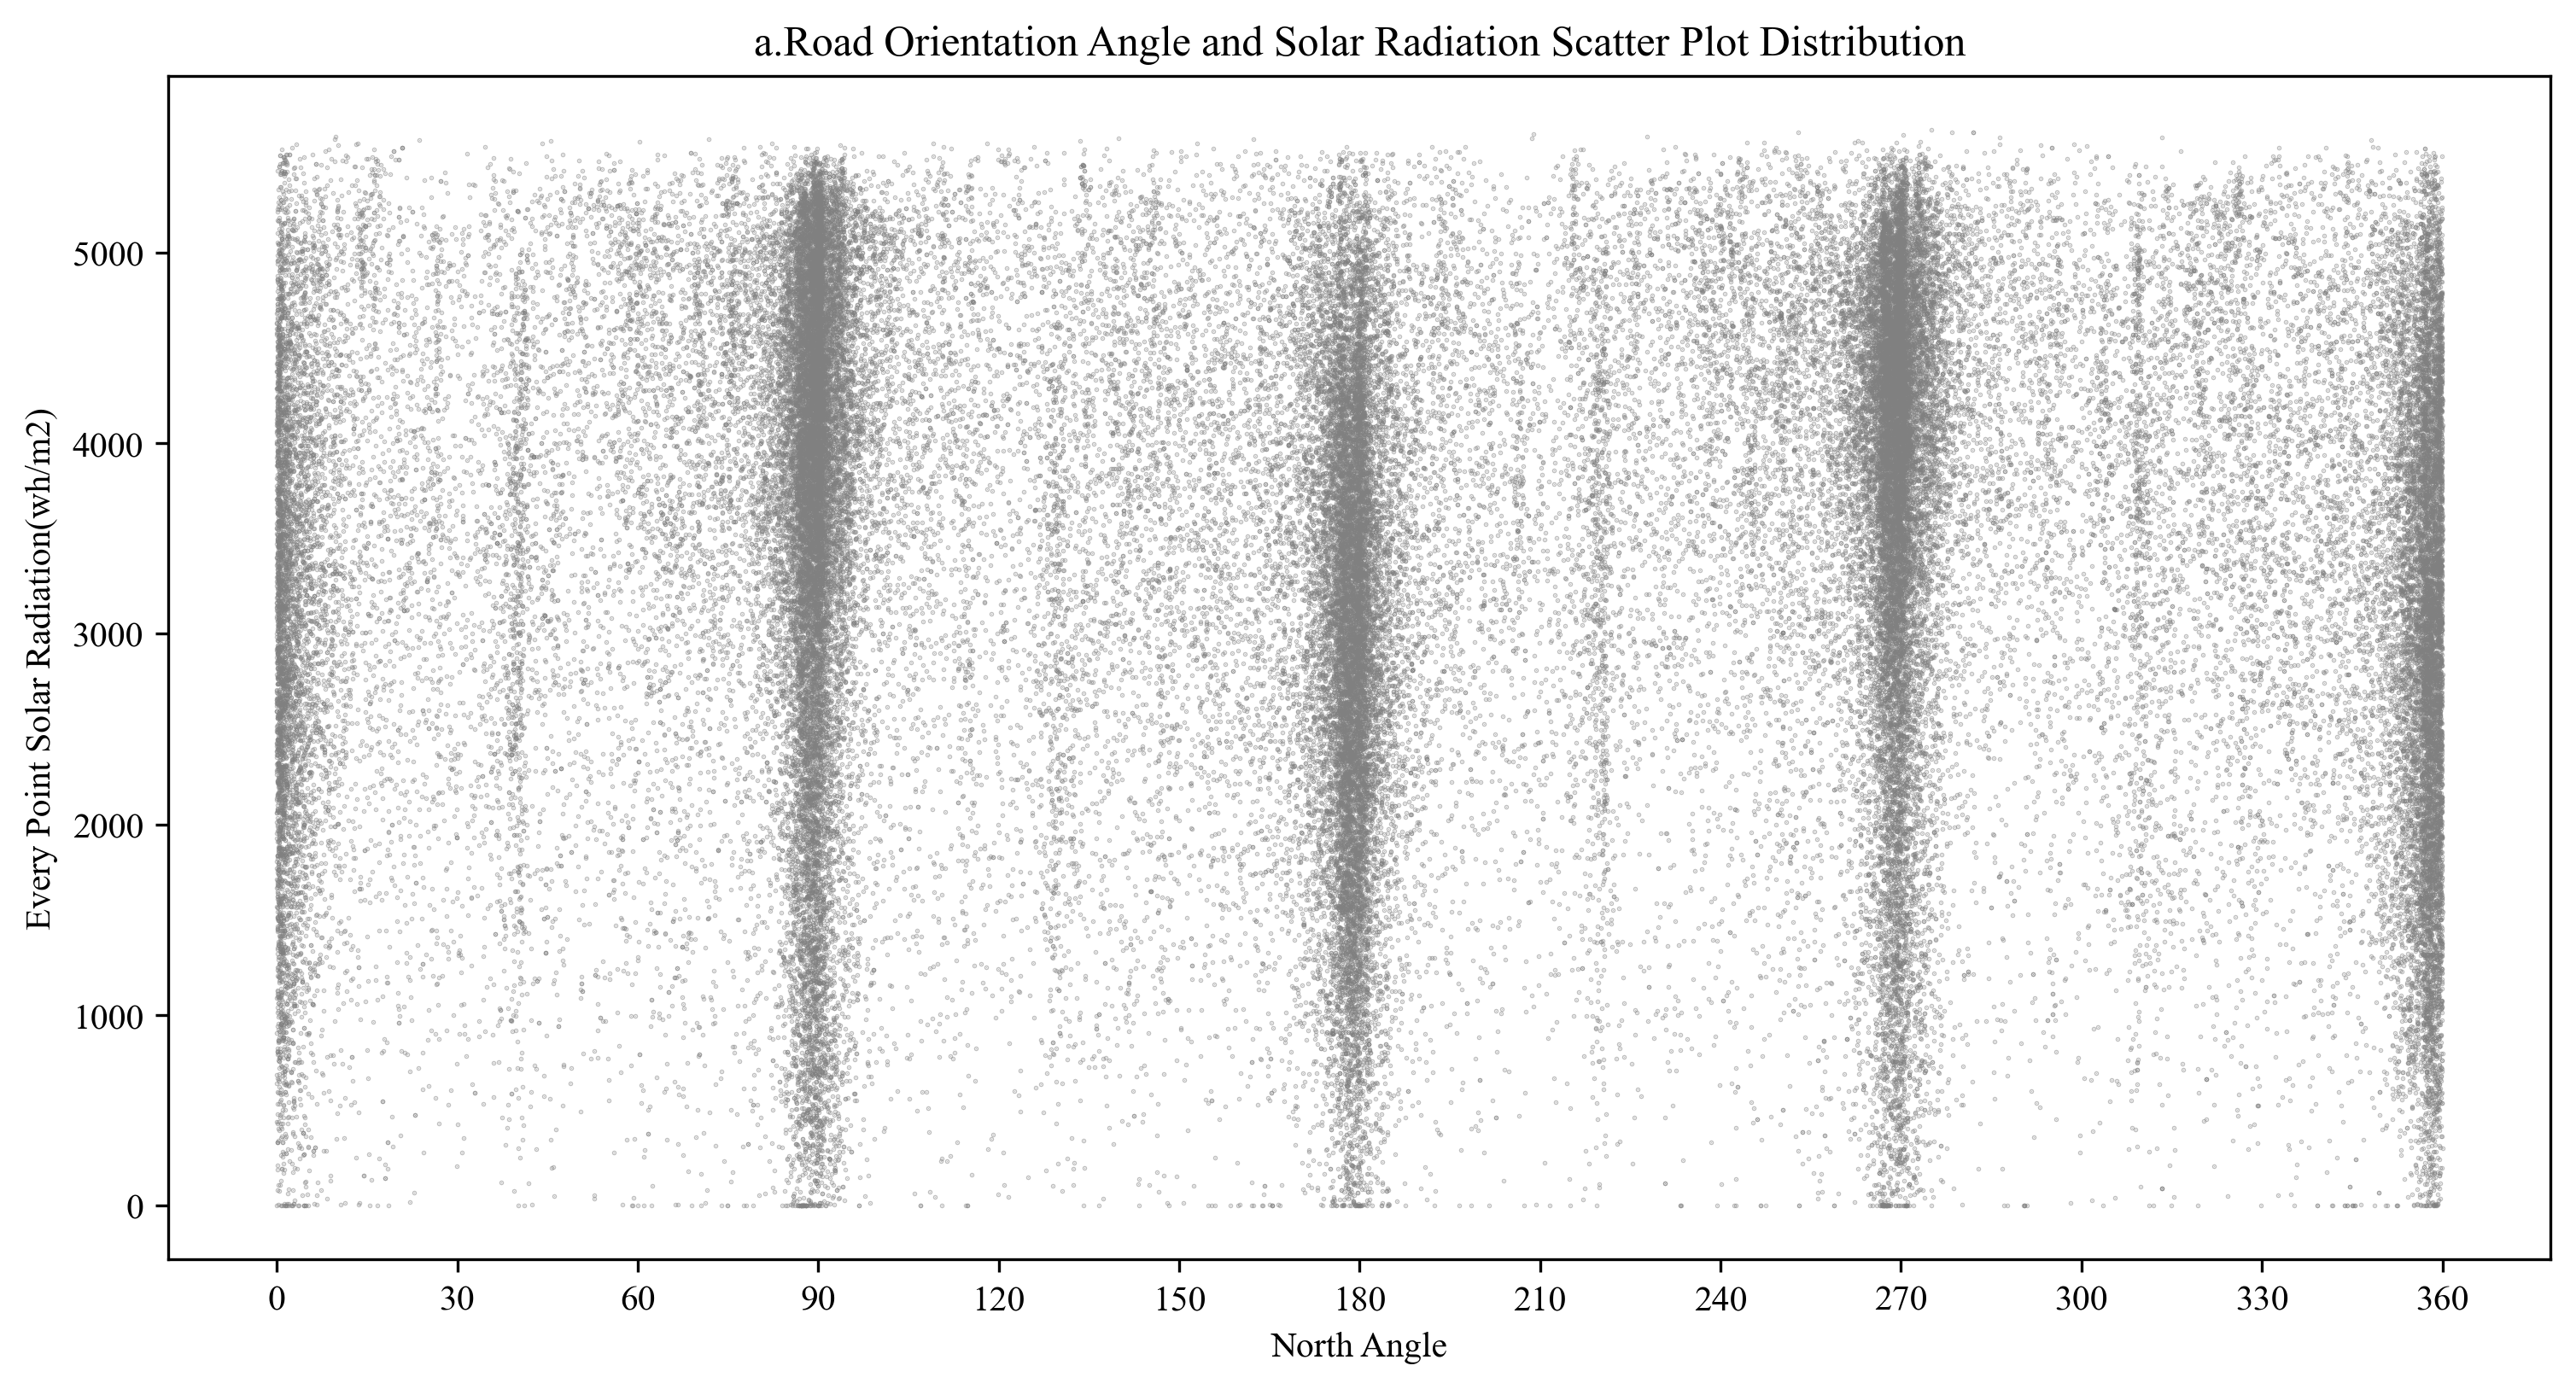

In [7]:
# Scatter plot with specified marker style and size
plt.figure(figsize=(12, 6),dpi=300)
plt.scatter(data['north_angle'], data['soalr_radiation'], color='grey', alpha=0.5, marker='o', s=0.1)

plt.title('a.Road Orientation Angle and Solar Radiation Scatter Plot Distribution')

plt.xlabel('North Angle')
plt.xticks(np.arange(min(data['north_angle']), max(data['north_angle']) , 30))

plt.ylabel('Every Point Solar Radiation(wh/m2)')
plt.grid(False)
plt.show()

# 折线图分析 角度和辐射均值关系

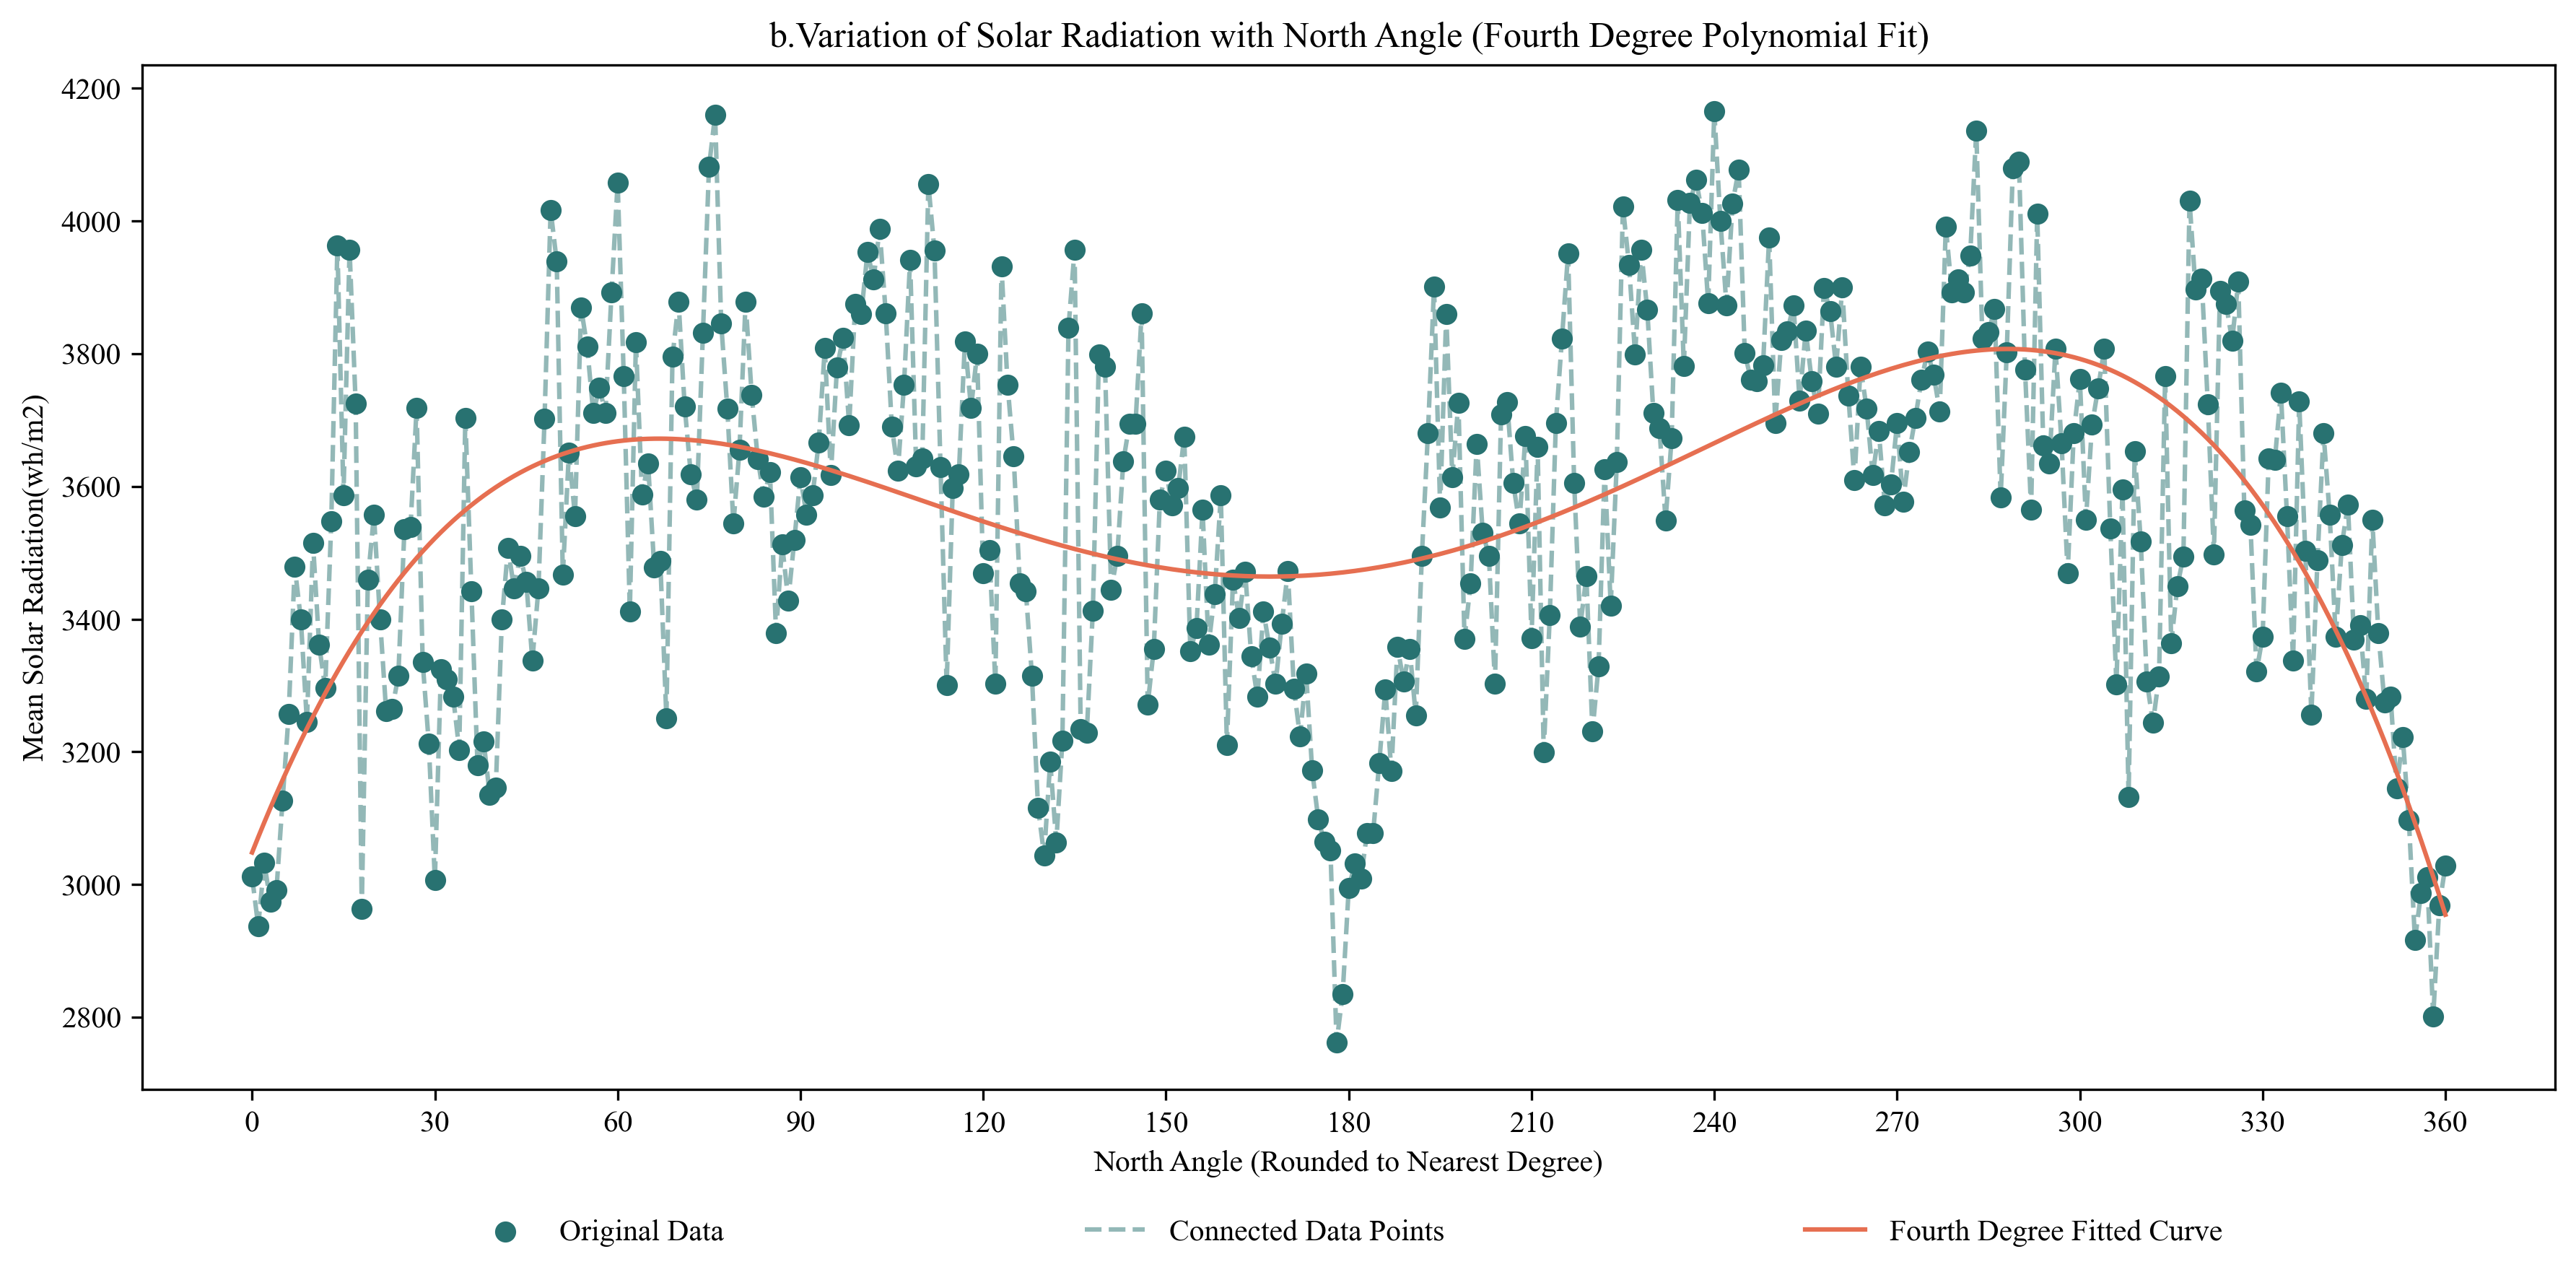

In [68]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv("./3.calculate_combin_pdpf.csv")

# 按照north_angle进行分组，并计算soalr_radiation的平均值
grouped_data = data.groupby(data['north_angle'].round()).soalr_radiation.mean().reset_index()

# 定义一个四次方程拟合函数
def fourth_degree(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# 使用四次方程拟合数据
params_4th_degree, _ = curve_fit(fourth_degree, grouped_data['north_angle'], grouped_data['soalr_radiation'])

# 使用拟合的曲线进行预测
predicted_values_4th_degree = fourth_degree(grouped_data['north_angle'], *params_4th_degree)

# 绘制原始数据、连接的点和四次方程的拟合曲线
plt.figure(figsize=(12, 6),dpi=300)

# 绘制原始数据
plt.scatter(grouped_data['north_angle'], grouped_data['soalr_radiation'], marker='o', label='Original Data', color='#287271')

# 连接数据点
plt.plot(grouped_data['north_angle'], grouped_data['soalr_radiation'], linestyle='--', alpha=0.5, color='#287271', label='Connected Data Points')
# 绘制四次方程的拟合曲线
plt.plot(grouped_data['north_angle'], predicted_values_4th_degree, '#e66f51', label='Fourth Degree Fitted Curve')

# 设置x轴标签的间隔为30
plt.xticks(np.arange(min(grouped_data['north_angle']), max(grouped_data['north_angle']) + 1, 30))

plt.xlabel('North Angle (Rounded to Nearest Degree)')
plt.ylabel('Mean Solar Radiation(wh/m2)')
plt.title('b.Variation of Solar Radiation with North Angle (Fourth Degree Polynomial Fit)')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False, columnspacing=12)

plt.grid(False)
plt.tight_layout()
plt.show()


# 扩展数据范围，使首尾曲线相连

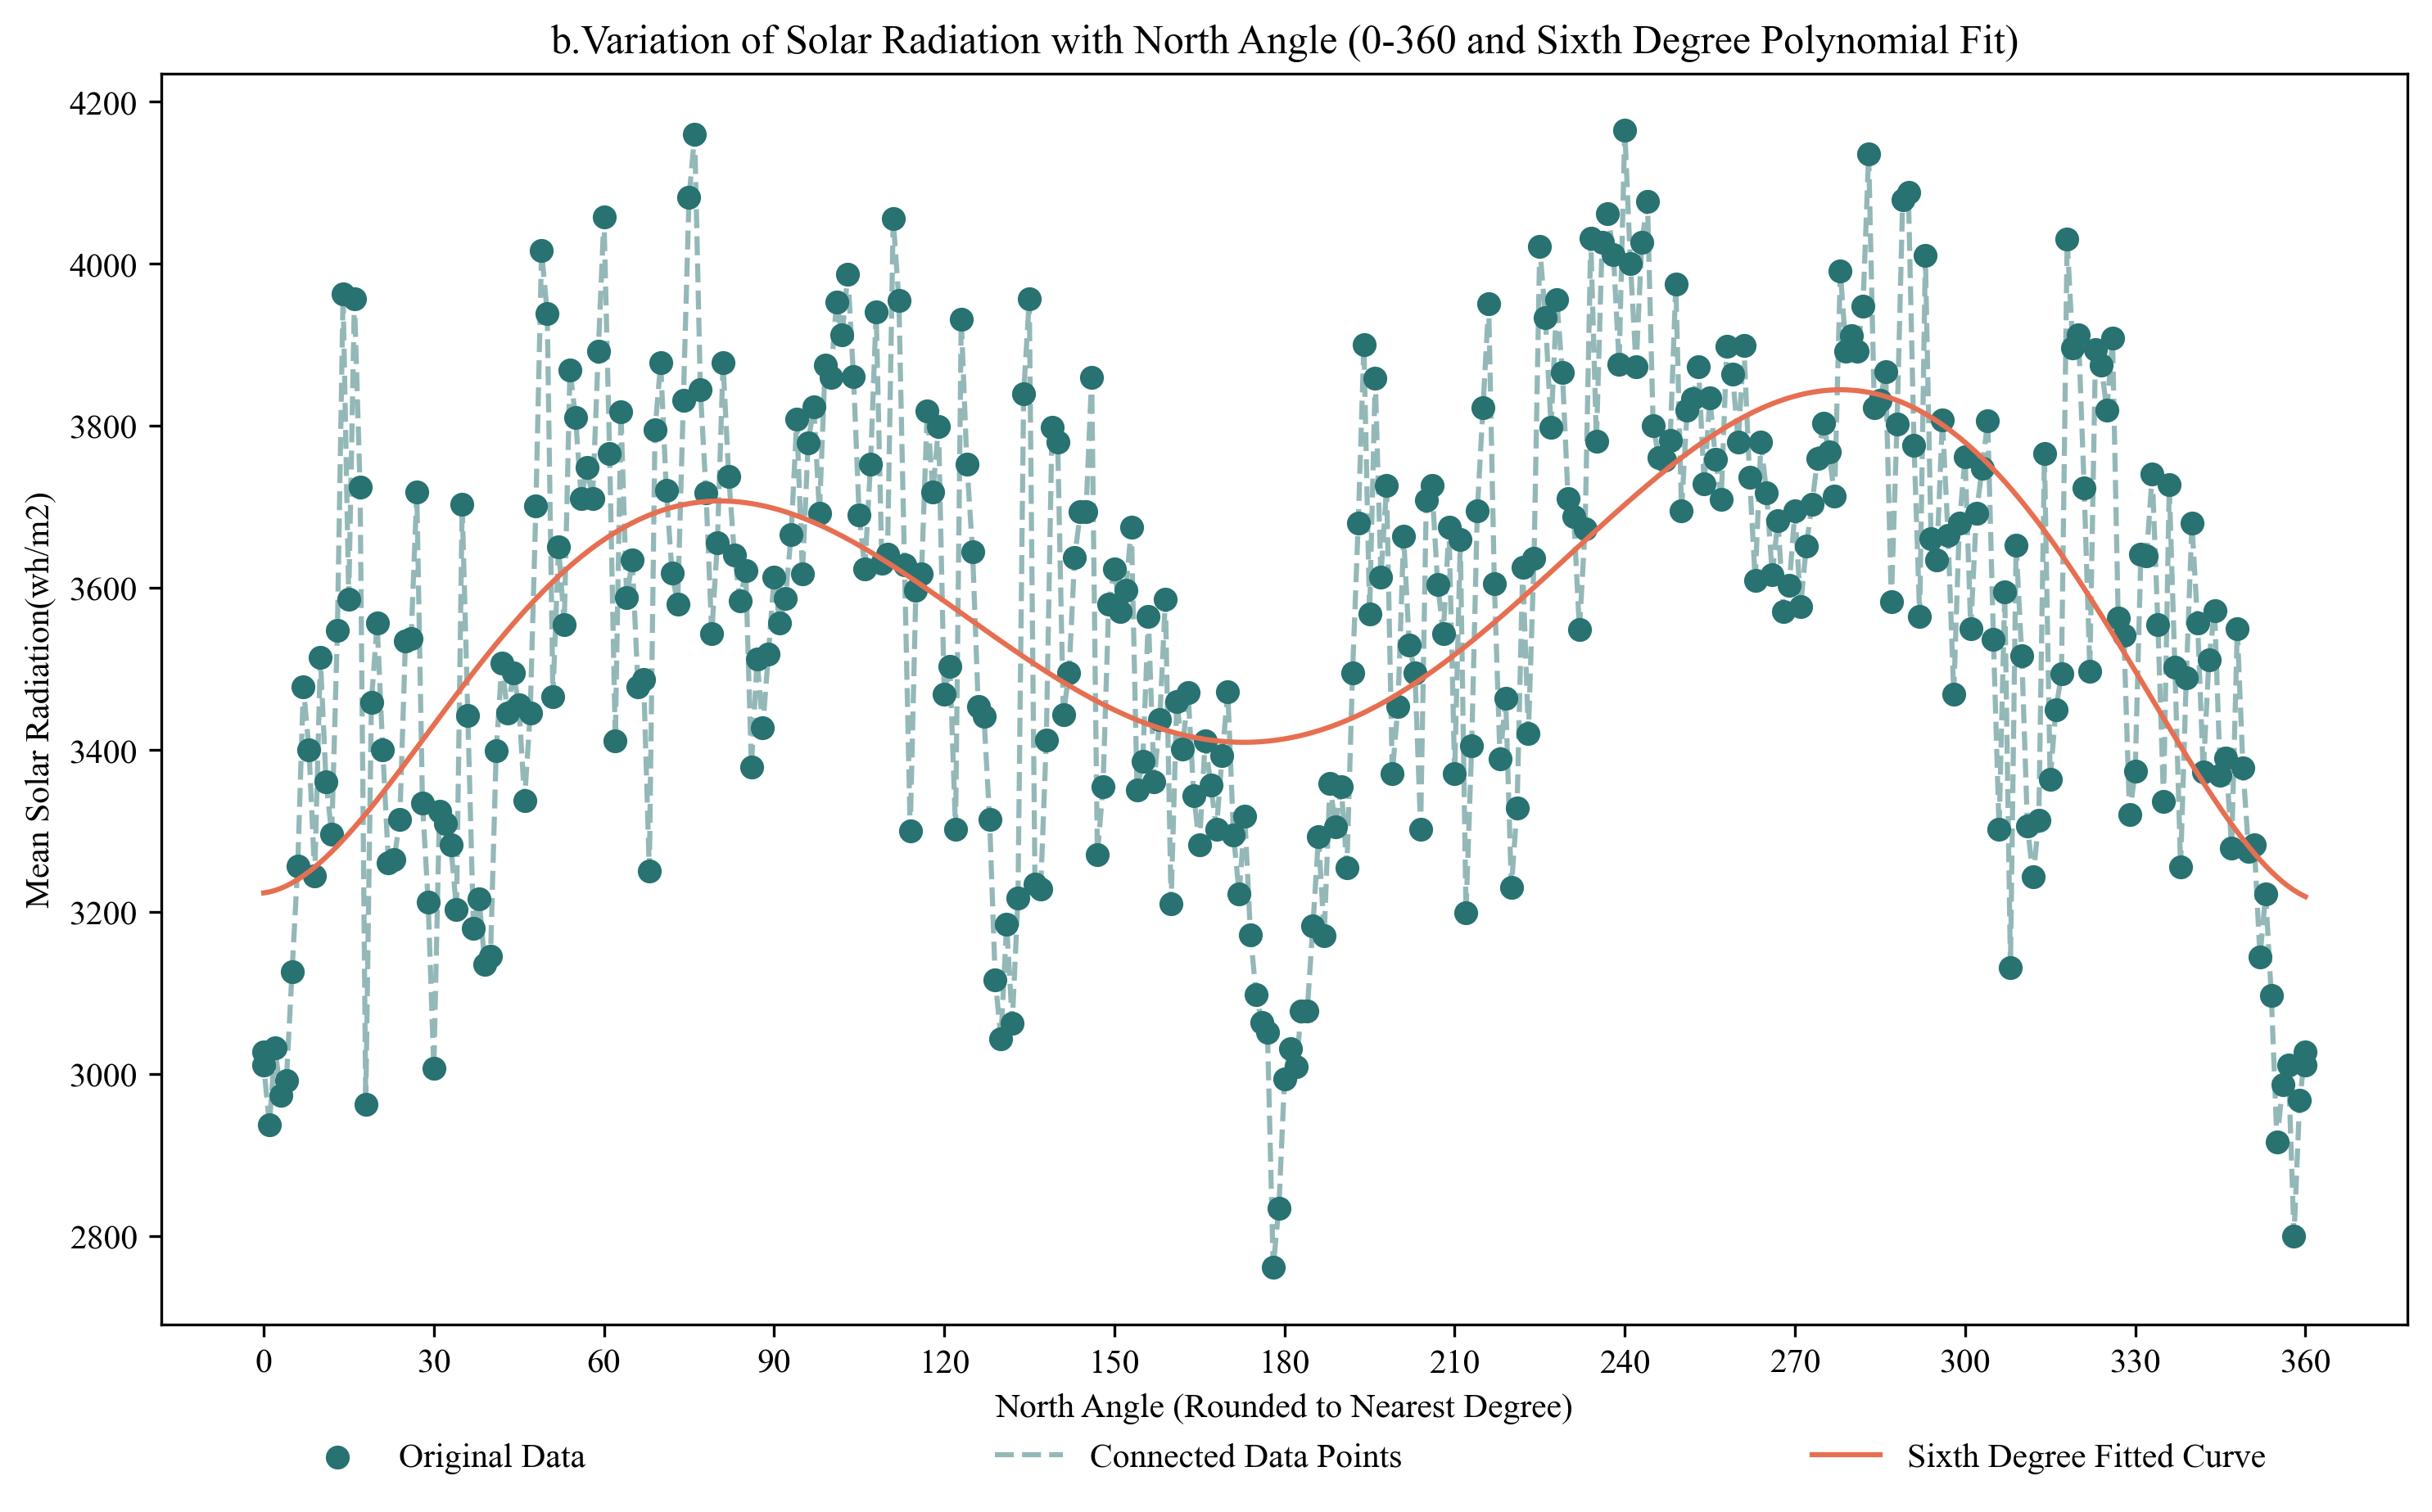

In [67]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv("./3.calculate_combin_pdpf.csv")

# 按照north_angle分组，计算soalr_radiation的平均值
grouped_data = data.groupby(data['north_angle'].round()).soalr_radiation.mean().reset_index()

# 定义六次方程
def sixth_degree(x, a, b, c, d, e, f, g):
    return a * x**6 + b * x**5 + c * x**4 + d * x**3 + e * x**2 + f * x + g

# 将330-360度的数据复制到-30-0度，将0-30度的数据复制到360-390度
data_to_prepend = grouped_data[(grouped_data['north_angle'] >= 330) & (grouped_data['north_angle'] <= 360)].copy()
data_to_prepend['north_angle'] -= 360
data_to_append = grouped_data[(grouped_data['north_angle'] >= 0) & (grouped_data['north_angle'] <= 30)].copy()
data_to_append['north_angle'] += 360
extended_grouped_data = pd.concat([data_to_prepend, grouped_data, data_to_append], ignore_index=True)

# 使用六次方程拟合数据
params_6th_degree, _ = curve_fit(sixth_degree, extended_grouped_data['north_angle'], extended_grouped_data['soalr_radiation'])

# 过滤数据，只显示0-360度范围的数据
filtered_data = extended_grouped_data[(extended_grouped_data['north_angle'] >= 0) & (extended_grouped_data['north_angle'] <= 360)]
predicted_values_filtered = sixth_degree(filtered_data['north_angle'], *params_6th_degree)

# 绘图
plt.figure(figsize=(10, 6),dpi=300)
# 绘制散点
plt.scatter(filtered_data['north_angle'], filtered_data['soalr_radiation'], marker='o', color='#287271', label='Original Data')
# 绘制虚线
plt.plot(filtered_data['north_angle'], filtered_data['soalr_radiation'], linestyle='--', alpha=0.5, color='#287271', label='Connected Data Points')
# 绘制曲线
plt.plot(filtered_data['north_angle'], predicted_values_filtered, '#e66f51', label='Sixth Degree Fitted Curve')

plt.xticks(np.arange(min(filtered_data['north_angle']), max(filtered_data['north_angle']) + 1, 30))
plt.xlabel('North Angle (Rounded to Nearest Degree)')
plt.ylabel('Mean Solar Radiation(wh/m2)')
plt.title('b.Variation of Solar Radiation with North Angle (0-360 and Sixth Degree Polynomial Fit)')
plt.grid(False)
plt.tight_layout()
# 设置图例
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), ncol=3, frameon=False, columnspacing=12)
plt.show()